In [1]:
%autosave 0

Autosave disabled


# 8. Neural networks and deep learning

This week, we'll learn about neural nets and build a model
for classifying images of clothes

In prior sessions we used *tabular data*
- Usually CSV file
- For the car prediction module, we had fields like:
    - Model
    - Make
    - City MPG
    - Highway MPG
    - MSRP
    - etc.
- Prior models (linear regression, logistic regression, tree-based models)
- Now we will look at *images*
    - Images of clothes specific

- Multi-class classification - 1 of 10 different clothing categories

Scenario: Fashion marketplace website
    - User wants to sell a t-shirt they made on the website
    - They upload the information and images of the product
    - We want a service to get the image and reply with a suggested product category
    - So in this case, the user will be suggested 'T-shirt' and they just have to accept
- Will be using fraction of dataset Alexey made - like Fashion MNIST
- Has train/test/validation split

Note: Much more practical section
- Lots of theory behind NNs and not realistic to cover all the theory
- Can go to https://cs231n.github.io/
    - Will reference this when needed

## Overview
1. This
2. Overview Tensorflow/Keras
3. Pre-trained networks
4. Some types of network layers and some intuition
5. Transfer learning - tuning previous trained model for another problem
6. Adjusting learning rate
7. Checkpointing
8. Adding more layers
9. Regularization/Dropout
10. Data augmentation
11. Training larger model
12. Using the model
13. Summary

## 8.1 Fashion classification

Dataset: 

* Full: https://github.com/alexeygrigorev/clothing-dataset
* Small: https://github.com/alexeygrigorev/clothing-dataset-small

Links:

* https://cs231n.github.io/

In [2]:
!git clone git@github.com:alexeygrigorev/clothing-dataset-small.git

fatal: destination path 'clothing-dataset-small' already exists and is not an empty directory.


## 8.2 TensorFlow and Keras

* Installing TensorFlow
* Loading images

[Tensorflow](https://www.tensorflow.org/) is a deep-learning framework. Available in other programming languages
- [Keras](https://keras.io/) is a simpler abstraction on top of Tensorflow

Use something like [Saturn](https://app.community.saturnenterprise.io/) if no GPU 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Keras used to be a separate library from Tensorflow, acting as a front-end for many ML frameworks. Now, it is just part of Tensorflow.
- If given code like `from keras.preprocessing.image import load_img`
- You just need to add tensorflow: `from tensorflow.keras.preprocessing.image import load_img`

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
from tensorflow.keras.preprocessing.image import load_img

Now we will try loading the images with Keras:

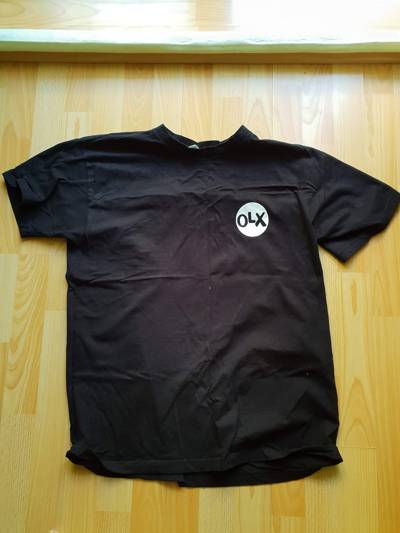

In [6]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

Neural networks have a **fixed input size**. Thus, all images being input to the network must be of the same input size as the input layer of the network.

![Network input](./images/8.2-network-input.png)

To resize the image:

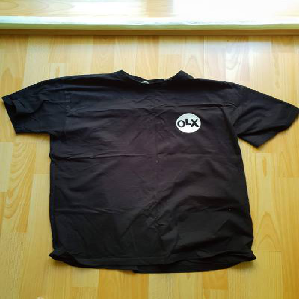

In [7]:
img = load_img(fullname, target_size=(299, 299))
img

Can save it to a variable:

In [8]:
x = np.array(img)
x.shape

(299, 299, 3)

In [9]:
x

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 253, 248]],

       [[188, 179, 110],
        [187, 178, 109],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 190, 128],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  24],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

Each row in *x* is a pixel, where the type of each is of unsigned int of 8 bits. That's 0-255

PIL, Python Image Library is the main image library used in Python:

In [10]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x24D6BE7BD60>


Images represented by *n* x *n* arrays, one for each channel
- Generally 3 channels (R,G,B)
- Each array cell is 0-255 (1 byte), which goes from black (0,0,0) to white (255,255,255)

![Image Channels](./images/8.2-image.png)

## 8.3 Pre-trained convolutional neural networks

* Imagenet dataset: https://www.image-net.org/
* Pre-trained models: https://keras.io/api/applications/

Now we will take these images, and use an pre-trained NN off the shelf and try them
- Keras has a lot of pre-trained models built in. Most are trained on ImageNet
- ImageNet has 1000 classes with ~1.3M training images, 50k val and 100k test
    - Won't download this, huge dataset for general-purpose image classification

Some people from big companies or universities, take ImageNet and train these models on ImageNet
- They share these results (model weights) and some are hosted by Keras
- Each model is generally a different architecture - layers and stuff are different
    - Reports size of model, accuracy, parameters, inference speed etc

Alexey usually chooses Xception - what we will use
- Decently small (88MB), decent acc and inference
- Usually there is a trade-off between size, accuracy and speed

Alexey used SageMaker for his notebook. Will show how to do this.
- GPUs are ~8x faster - better at matrix multiplications and number crunching
    - NNs are a mostly number crunching

Go to SageMaker
- Run after instance
- Hit `Jupyter Notebook`
- Choose kernel - Alexey uses conda_tensorflow2_p36

In [11]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

```
tf.keras.applications.Xception(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
```

Just call `Xception()` function directly.
- Want model pretrained on *imagenet*
- Want images of 299 x 299 in color (RGB - 3 channels)

In [12]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

Models generally expect a **batch of images.** Turn the example (*x*) into an input array (*X*):

In [13]:
X = np.array([x])

**1** model of size **299** x **299** with **3** channels (RGB)

In [14]:
X.shape

(1, 299, 299, 3)

Generally need to pre-process input before model gives out something useful. See:

In [15]:
model.predict(X)

1/1 [==============================] - 8s 8s/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e

This does not make sense - should not really be zeros.

Let's try pre-processing. It's already included from Keras to use for Xception:

In [16]:
X = preprocess_input(X)
X[0]

array([[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.41960788,  0.35686278, -0.20784312],
        ...,
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804]],

       [[ 0.47450984,  0.4039216 , -0.1372549 ],
        [ 0.4666667 ,  0.39607847, -0.14509803],
        [ 0.45882356,  0.38823533, -0.15294117],
        ...,
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.92941177]],

       [[ 0.56078434,  0.48235297, -0.00392157],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        ...,
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863]],

       ...,

       [[ 0.2941177 ,  0.18431377, -0.40392154],
        [ 0

No longer a number 0-255 in each cell. Now from -1 to 1. Need to use the same pre-processing the original model used, that's why we need this.

Models generally use `.predict()` on an input array:

In [17]:
pred = model.predict(X)
pred

1/1 [==============================] - 1s 664ms/step


array([[3.23906948e-04, 1.57356102e-04, 2.14061671e-04, 1.52962384e-04,
        2.46593147e-04, 3.04466317e-04, 3.23486514e-04, 1.47267565e-04,
        2.04896060e-04, 1.48675623e-04, 1.95688728e-04, 2.11611565e-04,
        7.61420233e-05, 1.14582785e-04, 1.64103752e-04, 2.07052071e-04,
        1.96353663e-04, 1.44528560e-04, 1.40088960e-04, 1.73659369e-04,
        7.50391919e-04, 2.55679333e-04, 2.66625051e-04, 2.96301470e-04,
        3.71916365e-04, 2.81156797e-04, 2.16775486e-04, 2.26857228e-04,
        3.82708269e-04, 1.72143031e-04, 3.08603223e-04, 1.97753339e-04,
        3.93680588e-04, 4.78151836e-04, 2.90636846e-04, 3.26570094e-04,
        1.47064347e-04, 1.63551143e-04, 2.14083717e-04, 1.34212620e-04,
        2.41738395e-04, 6.72467402e-04, 2.53308011e-04, 1.42915058e-04,
        4.11024841e-04, 2.05729404e-04, 3.04202345e-04, 1.50007996e-04,
        2.00622831e-04, 2.28341785e-04, 2.97204708e-04, 2.30761798e-04,
        6.29646005e-04, 7.81123992e-04, 2.47861375e-04, 4.030268

This is the probability that each class could be in the image. To make sense of this, we need the real-world knowledge of what class an output was supposed to represent. 
- Softmax functions (generally the last layer of classification models) return values which all add to 1
- In classification we use this to refer to the probability a class is in the image
- Generally need to get the top 1 or 5 classes

Xception includes a function to check:

In [18]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.6792238),
  ('n02916936', 'bulletproof_vest', 0.039596956),
  ('n04370456', 'sweatshirt', 0.035304822),
  ('n03710637', 'maillot', 0.0108846),
  ('n04525038', 'velvet', 0.0018057742)]]

Makes sense - mostly shirt-type clothes. Unfortunately not that specific to fashion and not useful for us.

However, we can take one of these models pre-trained on large datasets like ImageNet and adapt it to our use case.

## 8.4 Convolutional neural networks

* Types of layers: convolutional and dense 
* Convolutional layers and filters
* Dense layers

There are more layers. Read here: https://cs231n.github.io/

Example neural network:

![Neural Network](./images/8.4-network.png)

Let's take a look convolutional layers. Each layer forms a 'filter' which when convolved with the image, attends to a certain shape in the image.

![Convolution](images/8.4-network.png)

Attends by sliding a filter over the image and obtaining a feature map. Higher values mean higher similarity.
- Each of the 6 filters here has a feature map.

![Feature map](images/8.4-feature-maps.PNG)

Subsequent layers will return successive feature maps. This can keep going.

![Convolution Chain](images/8.4-convolution-chaining.PNG)

These filters are in fact learned. These get more high level as you go through the network as the feature map gets smaller.
- Generally, higher level features are in some way combinations of higher level shapes. The circle may be a combination of the two half circles
- Lower layers generally attend to simpler shapes like lines
- Allows to detect higher level features in images like "sleeves" rather than concepts like lines

![Filter Shapes](images/8.4-filter-shapes.PNG)

Higher level filter captures feature maps by comparing across output feature maps of the last layer:
- Computes in the same place in each of the feature maps (green square)
- If they all have similar high value, it attends across the maps

![Feature maps across](images/8.4-feature-maps-across.PNG)

Note that these filters are kind of just learned automatically. These are not taught by the scientist.

Result of the convolutional layers is a vector representation of the images.
- E.g. input image is *299 x 299 x 3* meanwhile the output vector is just 2048
- All the information the filters could extract are in the vector
    - Some areas of the vector may correspond to sleeves. Some may correspond to image or color

Not interpretable by humans, but NNs can make sense of it.
- Vector is more convenient to be used by NN
- Now can be inputted to **dense layers** - these will return the final predictions

![Full network](images/8.4-full-network.png)

Take the vector, e.g. [*x<sub>1</sub>, x<sub>2</sub>, x<sub>3</sub>, ..., x<sub>n</sub>*]
- Normally we may use something like binary classification via logistic regression to classifier T-shirt or not
- g(x) = sigmoid(x<sup>T</sup>w) -> prob *x* is a t-shirt

Example of this logistic model:

![Logistic Regression](images/8.4-logistic-regression.PNG)

Now imagine we want to build a model for multiple classes. Now have shirt and dress classes.
- For this we could build 3 models, one for each class:

![Softmax](images/8.4-softmax.png)

Softmax is a generalization of sigmoid for multiple classes. This is a neural network. 

This is what a **dense layer** is. Nothing but matrix multiplication. Also called **feed-forward network**. The dense amount of connections gives it its name:

![Dense layer](images/8.4-dense-layer..PNG)

- Each output has its on weight. So, to get output all we need to do is multiply Weight matrix *W* by the input *x*

Brief: Pooling layers
- Given a feature map, pooling layers takes these and makes them smaller.
- Generally used to make neural network smaller.
- E.g. feature maps 200 x 200 x 6 to 100 x 100 x 3

Can chain these just as we chain convolutional layers.

Final network would go
1. Input
2. Convolutional layer(s)
3. Vector representation
4. Dense layer(s)
5. Output

## 8.5 Transfer learning

* Reading data with `ImageDataGenerator`
* Train `Xception` on smaller images (150x150)

(Better to run it with a GPU)

Taking Xception that was already trained on ImageNet
- Model has learned filters over trained already. Can be used for many purposes
- Model learned to take any picture and turn it into a vector representation
    - This is already pretty generic, no need to change for our task
- Models need a HUGE amount of images to come up with these filters - not feasible

Dense layers are learned for each dataset
- ImageNet has 1000 classes - dense layers have 1000 outputs
    - Do not need this - need to adjust these to have our classes (just 10 outputs)
- We will **train new dense layers**
    - The most difficult part learned - the convolutions - can be reused and transferred to this problem

**ImageDataGenerator** easily reads and augments images:

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [40]:
# Can pass our preprocessing function directly
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Just specifying the image folder, target size, and batch size
train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


Our ImageDataGenerator parameters:
- We drop image size from *299 x 299* to *150 x 150* as that is half the image size
    - Allows faster training - we will go back after
- Batch size of 32 means we train and adjust parameters with 32 images at once
    - Inputting vector of size *32 x 150 x 150 x 3*

In [41]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

Generates classes automatically from folder names:

In [42]:
!ls -l clothing-dataset-small/train

'ls' is not recognized as an internal or external command,
operable program or batch file.


Generator is actually an iterator. `next()` function is built-in and called in loops:

In [43]:
X, y = next(train_ds)

Can see that X has been preprocessed:

In [44]:
# X

In [45]:
X.shape

(32, 150, 150, 3)

Vector size is as we predicted. Let's look at *y*:

In [46]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

One-hot encoding: we can see the first is pants, second is t-shirt, etc
- Can think of these as 10 different binary variables (e.g. pants or not pants, dress or not dress)

Now we do the same thing for Validation Generator. Only thing different is *input folder*

In [47]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


Validation generator doesn't need to be shuffled.

Now we will fine-tune the pre-trained Xception model.
- Recall we are keeping the convolutional layers
- We are removing the dense layers (not 'including top') and replacing for our own classes
    - Keras conceptualizes models from bottom to top:
    - Model is vertical, going from image to prediction.
    - The "top" is the dense layers leading to predictions
- We are setting the 'base model' (the bottom) to NOT trainable
    - We do not want to adjust the convolutional layers - that holds the knowledge
  
![Include top](images/8.5-include-top.png)

In [53]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

# Set this to false because we do not want to adjust the convolutional layers
base_model.trainable = False

# Just the shape of an individual image. Redundant but we have to
inputs = keras.Input(shape=(150, 150, 3))
# IMPORTANT: this must be set to False as well
base = base_model(inputs, training=False)
# The output vectors: don't do anything
outputs = base
# Use model to put it all together
model = keras.Model(inputs, outputs)

Let's look at the vector layer:

In [56]:
# May be slow the first time as it is moving model to GPU
preds = model.predict(X)

1/1 [==============================] - 0s 40ms/step


In [57]:
preds.shape

(32, 5, 5, 2048)

What does this mean? Each image gets passed through the convolutional layers into feature map
- Each one is *5* x *5* x *2048*
- Needs to be converted to 1D vector
    - Can take *5* x *5* 2D slice, take the average, and put it into our vector representation
    - This is *2D average pooling*, as it is reducing the size (pooling) of a 2D vector by averaging
    
![Pooling](images/8.5-pooling.png)

Let's applying this pooling now:

In [64]:
# The otuput vectors are pool. Immediately apply to a base
# Called the FUNCTIONAL style of building models
vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = vectors

model = keras.Model(inputs, outputs)

In [65]:
preds = model.predict(X)

1/1 [==============================] - 1s 655ms/step


In [66]:
preds.shape

(32, 2048)

Now have managed to shrink each vector into 1D for each image. Now we want the dense layer to make predictions
- At the end we want a *32* x *10* array (batch size x # of classes)
- Want to do this with a dense layer

In [68]:
# Showing everything for clarity
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [69]:
preds = model.predict(X)

1/1 [==============================] - 1s 804ms/step


In [70]:
preds.shape

(32, 10)

![Model recap](images/8.5-model.png)

Recapping the model:
1. Start with inputs of 150 x 150 x 3 (image size x 3 channels for RGB)
2. We apply the base model (learned convolutional layers/filters) to get feature map
3. Apply 2D Average Pooling to feature maps to get vectors that can be classified
4. Use 10 output Dense layer to classify vectors
5. This is used by model object to use when invoking `predict()`

In [71]:
preds[0]

array([-0.5865158 ,  0.5891671 , -0.35055712, -0.00867048, -0.8770141 ,
       -0.05539182, -0.72189647, -0.9973344 ,  1.0204681 ,  0.17884897],
      dtype=float32)

Outputs are actually nonsense. We have not trained the top layer so it is just the random initialization still.
- Need to train this. We need a few things:
    1. Optimizer (thing that finds the best weights)
        - Uses SGD to adjusts the weight matrices of the dense layer such that it optimizes some value
        - We will use the **Adam** optimizer from [Keras](https://keras.io/api/optimizers/)
    2. Loss (value to optimize)

In [72]:
# LR is amount to change weights by each update
learning_rate = 0.01

# We will go with Adam, which is the generally recommended default
#     Learning rate is kind of like the ETA in XGBoost
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# Multiclass classification problem - so we use categorical (multi-class) crossentropy (good for classification)
#     Generally the lower the number the better. This is the number the optimizer is trying to minimize
# Recall we used MeanSquaredError for Linear Regression
loss = keras.losses.CategoricalCrossentropy(from_logits=True)
# Depends whether y_pred is expected to be a logits tensor. Assumes y_pred encodes a probability distribution
#     May be more numerically stable. This is the general recommendation

Recall when we talked about dense layers. We have a feed-forward networking going into a softmax layer
- Can call softmax part the "activation"
- Takes the FFN output to make into a probability. This row output of the dense layer is the logits
    - Without softmax we would have row score. This is **from_logits=True**
- If we want probabilities instead of row score, we would use:
    - `outputs = keras.layers.Dense(10, activation='softmax')(vectors)`
    - `loss = keras.losses.CategoricalCrossentropy(from_logits=False)`

Now we just need to compile model for training. Need to specify:
- Optimizer
- Loss
- Metric to monitor

In [73]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

To train, we use `model.fit()`. Needs train dataset and number of epochs
- Epochs are the number of times to go over the training set
    - Recall this is broken up into batches of 32
- We also use the validation dataset to better gauge accuracy

In [74]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 66s 647ms/step - loss: 1.2566 - accuracy: 0.6741 - val_loss: 0.9105 - val_accuracy: 0.7889
Epoch 2/10
96/96 [==============================] - 8s 79ms/step - loss: 0.6344 - accuracy: 0.8165 - val_loss: 0.9013 - val_accuracy: 0.8035
Epoch 3/10
96/96 [==============================] - 8s 81ms/step - loss: 0.3497 - accuracy: 0.8830 - val_loss: 1.0435 - val_accuracy: 0.7918
Epoch 4/10
96/96 [==============================] - 8s 80ms/step - loss: 0.2366 - accuracy: 0.9228 - val_loss: 0.8081 - val_accuracy: 0.8328
Epoch 5/10
96/96 [==============================] - 8s 81ms/step - loss: 0.1586 - accuracy: 0.9443 - val_loss: 0.9303 - val_accuracy: 0.7918
Epoch 6/10
96/96 [==============================] - 8s 79ms/step - loss: 0.1295 - accuracy: 0.9544 - val_loss: 1.0807 - val_accuracy: 0.7977
Epoch 7/10
96/96 [==============================] - 8s 81ms/step - loss: 0.0950 - accuracy: 0.9658 - val_loss: 1.0466 - val_accuracy: 0.7918
Epoch 8/10


Accuracy gets close to 1 but validation accuracy oscilates around 0.80. This is clearly over-fitting.

Let's take a look at the history object we saved:

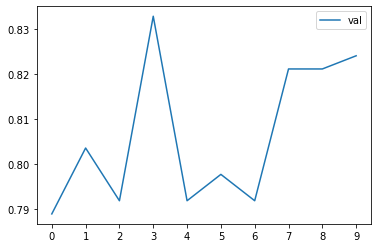

In [78]:
# plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

We can see that validation accuracy immediately jumpts to ~0.80 then oscillates a lot.
- Likely would not improve on subsequent epochs

## 8.6 Adjusting the learning rate

This is the most important parameter to tune.
* What's the learning rate
* Trying different values

Can think of learning rate as how fast you read.
- E.g. you read 1 book/quarter, so you read 1 book per year
- Alternatively you read very fast; 1 book per day
    - But if you read so fast, maybe you're just skimming through
    - When you tried to apply, you do not remember much, as opposed to the 4/year
- Maybe you read very slow, maybe 1/year
    - You take notes and summarize and make sure to remember everything
    - You nearly memorize book by the end of the year
    
Your learning rate is *low* with 1/year, *medium* is 4/year, *high* is 365/year
- For *low* you learn the best, but its just much too slow
- For *high* you read the most, but you do not know as much
- Need the happy medium

We can think of reading as the learning rate for training.
- Applying what we learned is the validation step
    - Too fast - overfit
    - Too slow - underfit
    - Medium - good fitting

Let's make a function to try training a model for a given lr:

In [81]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    # Could also make this part its own function
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

Now we will iterate over different values for lr. Simply run for 10 epochs perlearning rate:

In [82]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 11s 88ms/step - loss: 2.0032 - accuracy: 0.3057 - val_loss: 1.6461 - val_accuracy: 0.4692
Epoch 2/10
96/96 [==============================] - 8s 79ms/step - loss: 1.4056 - accuracy: 0.5691 - val_loss: 1.2634 - val_accuracy: 0.6305
Epoch 3/10
96/96 [==============================] - 7s 77ms/step - loss: 1.1445 - accuracy: 0.6496 - val_loss: 1.0726 - val_accuracy: 0.6745
Epoch 4/10
96/96 [==============================] - 8s 82ms/step - loss: 0.9981 - accuracy: 0.6887 - val_loss: 0.9600 - val_accuracy: 0.7155
Epoch 5/10
96/96 [==============================] - 8s 84ms/step - loss: 0.9050 - accuracy: 0.7132 - val_loss: 0.8844 - val_accuracy: 0.7507
Epoch 6/10
96/96 [==============================] - 8s 86ms/step - loss: 0.8372 - accuracy: 0.7340 - val_loss: 0.8288 - val_accuracy: 0.7683
Epoch 7/10
96/96 [==============================] - 8s 80ms/step - loss: 0.7866 - accuracy: 0.7480 - val_loss: 0.7877 - val_accuracy: 0.7742
Epoch

Let's plot this:

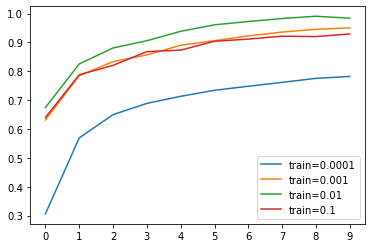

In [83]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
#     plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

Green (0.01) is the best on training dataset. Weird, it should be red (0.1)
- 0.0001 is the worst only reaching ~.70

Validation accuracy vs lr:

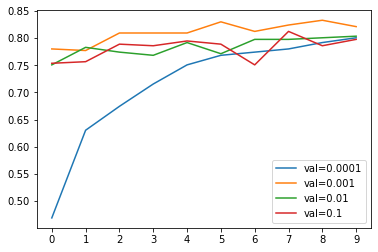

In [86]:
for lr, hist in scores.items():
#     plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

Again, 0.0001 learns too slowly. Goes up steadily but still ends up with the other ~77.5%.

Let's drop the worst and look closely:

In [87]:
del scores[0.1]
del scores[0.0001]

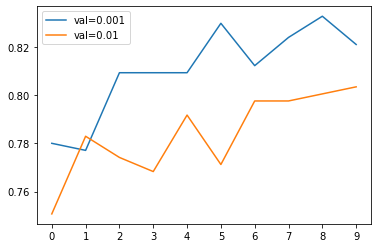

In [88]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

0.001 is generally better after the start. Probably better in general.

We will continue with this LR

In [89]:
learning_rate = 0.001

Let's compare to training data:

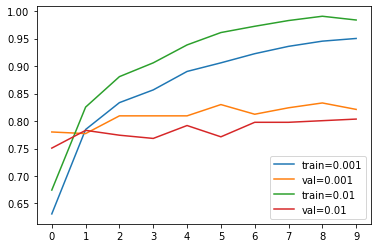

In [90]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

0.01 having a bigger gap between training and validation is actually an argument against 0.001. 

We will still continue with 0.001

## 8.7 Checkpointing

Way to save the model at each iteration. Want to retain the model at the peaks of the oscillation in val acc
* Saving the best model only
* Training a model with callbacks

After each epoch, the weight are updated and model is applied to validation dataset
- After each epoch, you can invoke **callbacks**
    - These are functions called at the end - can basically do anything
    - Validation checking and histories implemented by callbacks
    
Saved in `keras.callbacks`. Name is 'model_v1.h5', save format is h5:

In [70]:
model.save_weights('model_v1.h5', save_format='h5')

Keras uses the `.format()` method to adjust names on the fly:

In [92]:
'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5'.format(epoch=3, val_accuracy=0.84)

'xception_v1_03_0.840.h5'

02d: 2 digits with leading if there's only one digit.
- .3f only first 3 digits after decimal of float

Next parameter is `save_best_only`.
- E.g. model gets 72% of the first epoch, 80% on the second, and so on
    - 72% is the best after the first epoch. Only saves acc above that
    - After 80%, this is the new floor to save another checkpoint
    - If the next acc is 79%, it will not get saved

Last parameter is `mode`. We chose 'max' as accuracy is a value we are maximizing
- Might set 'min' for MeanSquaredError or Loss

In [97]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

Use by passing list of callback references to `callbacks` parameter of `model.fit()`

In [98]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 [==============================] - 19s 163ms/step - loss: 1.1393 - accuracy: 0.6160 - val_loss: 0.7060 - val_accuracy: 0.7801
Epoch 2/10
96/96 [==============================] - 10s 108ms/step - loss: 0.6319 - accuracy: 0.7898 - val_loss: 0.6278 - val_accuracy: 0.7889
Epoch 3/10
96/96 [==============================] - 10s 100ms/step - loss: 0.5108 - accuracy: 0.8272 - val_loss: 0.5729 - val_accuracy: 0.8006
Epoch 4/10
96/96 [==============================] - 8s 82ms/step - loss: 0.4335 - accuracy: 0.8628 - val_loss: 0.5530 - val_accuracy: 0.8123
Epoch 5/10
96/96 [==============================] - 8s 84ms/step - loss: 0.3725 - accuracy: 0.8885 - val_loss: 0.5415 - val_accuracy: 0.8123
Epoch 6/10
96/96 [==============================] - 8s 84ms/step - loss: 0.3288 - accuracy: 0.9045 - val_loss: 0.5229 - val_accuracy: 0.8182
Epoch 7/10
96/96 [==============================] - 9s 92ms/step - loss: 0.2961 - accuracy: 0.9149 - val_loss: 0.5160 - val_accuracy: 0.8299
Epoch 8

Can see checkpoints were only saved until epoch 7. After that the val acc got worse so nothing was saved

In [99]:
!dir

 Volume in drive E is Holodrum
 Volume Serial Number is 6EA3-E59A

 Directory of E:\andre\Documents\mlbookcamp-code\course-zoomcamp\08-deep-learning

11/24/2022  05:20 PM    <DIR>          .
11/24/2022  05:20 PM    <DIR>          ..
11/23/2022  10:31 PM    <DIR>          .ipynb_checkpoints
11/15/2022  02:53 PM             1,344 01-fashion-classification.md
11/15/2022  02:53 PM               752 01b-saturn-cloud.md
11/15/2022  02:53 PM             1,461 02-tensorflow-keras.md
09/19/2022  01:07 PM             1,105 03-pretrained-models.md
11/15/2022  02:53 PM             1,314 04-conv-neural-nets.md
11/15/2022  02:53 PM             1,552 05-transfer-learning.md
11/15/2022  02:53 PM               947 06-learning-rate.md
11/15/2022  02:53 PM               894 07-checkpointing.md
11/15/2022  02:53 PM             1,052 08-more-layers.md
11/15/2022  02:53 PM             1,195 09-dropout.md
09/19/2022  01:07 PM               927 10-augmentation.md
09/19/2022  01:07 PM               744 11-larg

Just delete the worse checkpoints

## 8.8 Adding more layers


* Adding one inner dense layer
* Experimenting with different sizes of inner layer

![Network V1](images/8.8-v1.png)

Recall old network:
1. Inputs
2. Base models
3. Vectors (2D Avg pooling)
4. Outputs (dense layer)

Let's call this existing model 'v1'.

![Dense 2](images/8.8-dense-2.png)

Let's try creating 'v2' with another dense layer:

In [105]:
# Add the 'size_inner' parameter for the size of the first dense layer
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    # Need to choose another activation. We are working with row scores we need an 'intermediate' function
    #     ReLU is kind of the recommended default
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    # Do not need to specify 'softmax' as it is implied with 'from_logits'
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

Activation Functions:
- Output
    - Sigmoid
    - Softmax
- Intermediate
    - ReLU (Rectified Linear Unit) 
        - zero when x < 0, x when x > 0
    - Leaky ReLu
    - GeLu

When you're unsure, just go with ReLU

Now we will experiment with different layer sizes.
- Did not add checkpointing here just for simplification.

In [110]:
# The best learning rate from before
learning_rate = 0.001

scores = {}

# Trying the same size, large and super large
for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 [==============================] - 13s 104ms/step - loss: 1.6021 - accuracy: 0.4140 - val_loss: 1.2659 - val_accuracy: 0.5279
Epoch 2/10
96/96 [==============================] - 9s 95ms/step - loss: 1.0998 - accuracy: 0.6004 - val_loss: 1.0038 - val_accuracy: 0.6598
Epoch 3/10
96/96 [==============================] - 9s 88ms/step - loss: 0.8252 - accuracy: 0.7399 - val_loss: 0.7999 - val_accuracy: 0.7449
Epoch 4/10
96/96 [==============================] - 8s 84ms/step - loss: 0.6645 - accuracy: 0.7829 - val_loss: 0.6968 - val_accuracy: 0.7830
Epoch 5/10
96/96 [==============================] - 11s 111ms/step - loss: 0.5578 - accuracy: 0.8201 - val_loss: 0.6713 - val_accuracy: 0.7830
Epoch 6/10
96/96 [==============================] - 11s 111ms/step - loss: 0.4952 - accuracy: 0.8380 - val_loss: 0.6351 - val_accuracy: 0.7801
Epoch 7/10
96/96 [==============================] - 12s 126ms/step - loss: 0.4390 - accuracy: 0.8598 - val_loss: 0.6154 - val_accuracy: 0.7918
Ep

See GPU usage with `nvidia-smi`.
- Can run this in terminl in Jupyter. Go to New > Terminal
- Can see GPU usage, memory usage, power usage

If were using about <40% GPU were are probably not using it and something is wrong.

Let's plot the validation accuracy for the different model sizes:

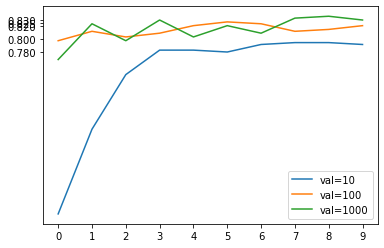

In [111]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

Very little difference between 10 and 100 layer size. 
- Running for longer would likely have them both oscillate longer. Let's look closer at 100 and 1000

In [112]:
del scores[10]

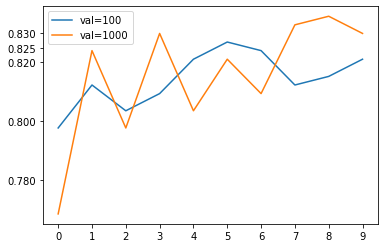

In [113]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

Adding these layers does not show a significant performance difference at the cost of complexity.
- Let's take the best and see if the regularization helps

## 8.9 Regularization and dropout

* Regularizing by freezing a part of the network
* Adding dropout to our model
* Experimenting with different values

E.g. we are classifying the t-shirt image again. We see there is a circular logo
- 10 epochs means we go over the dataset 10 times - we see the image 10 times
- The neural network may recognize a pattern like "having a logo like this means t-shirt"
- This is not a useful rule for the network to learn. Want NN to focus on things like sleeves, collar etc
    - Broad shapes, not details
    
How do we fight this?
- Say, during training, we hide a part of the network
    - Imagine a square patch blacking out a different part of the image each time the NN sees it
- This is the main idea behind **dropout**

Dropout randomly hides a part of the input by soft removing connections in the network.

![Vector Representation](images/8.9-vector.png)

When the CNN encodes the image to the vector representation, we can imagine each part of the image encoded in the vector (see image)

![Dropout](images/8.9-dropout.png)

Dropout is actually implemented by randomly freezing connections, and not using a specific neuron 
- Effectively ignore part of an image. Results in ignoring filtering for a circle - during part of training
    - Forces surrounding neurons to be more effective and pick up the slack, not over relying on a feature
- Ignoring extranneous details like logos or backgrounds forces NN to focus on the important features

Latter layers still take the output from this neuron though.

Let's try adding dropout to our make_model function:

In [116]:
# Droprate is the amount of the layer we want to freeze
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    # Dropout applies to the immediate prior layer 
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

![Droprate](images/8.9-droprate.png)

Randomly freezes the amount of neurons specified each epoch

Let's call this V3 of the model

![Model V3](images/8.9-v3.png)

Now we will experiment with different drop rates.
- Experiment with no dropout up to 0.8 dropout
- Need to experiment for longer (30 epochs) because dropout actively inhibits network learning

In [118]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
96/96 [==============================] - 14s 112ms/step - loss: 0.9474 - accuracy: 0.6754 - val_loss: 0.6274 - val_accuracy: 0.8065
Epoch 2/30
96/96 [==============================] - 9s 93ms/step - loss: 0.5034 - accuracy: 0.8263 - val_loss: 0.5811 - val_accuracy: 0.8152
Epoch 3/30
96/96 [==============================] - 8s 81ms/step - loss: 0.3599 - accuracy: 0.8797 - val_loss: 0.6055 - val_accuracy: 0.7947
Epoch 4/30
96/96 [==============================] - 7s 78ms/step - loss: 0.2607 - accuracy: 0.9146 - val_loss: 0.5614 - val_accuracy: 0.8240
Epoch 5/30
96/96 [==============================] - 7s 78ms/step - loss: 0.1781 - accuracy: 0.9521 - val_loss: 0.5570 - val_accuracy: 0.8123
Epoch 6/30
96/96 [==============================] - 8s 79ms/step - loss: 0.1318 - accuracy: 0.9677 - val_loss: 0.5465 - val_accuracy: 0.8270
Epoch 7/30
96/96 [==============================] - 7s 77ms/step - loss: 0.0903 - accuracy: 0.9850 - val_loss: 0.6541 - val_accuracy: 0.8240
Epoch 8

Epoch 29/30
96/96 [==============================] - 8s 79ms/step - loss: 0.0160 - accuracy: 0.9967 - val_loss: 0.7980 - val_accuracy: 0.8123
Epoch 30/30
96/96 [==============================] - 8s 79ms/step - loss: 0.0226 - accuracy: 0.9938 - val_loss: 0.8340 - val_accuracy: 0.8182


0.5
Epoch 1/30
96/96 [==============================] - 11s 87ms/step - loss: 1.2876 - accuracy: 0.5756 - val_loss: 0.7792 - val_accuracy: 0.7449
Epoch 2/30
96/96 [==============================] - 8s 81ms/step - loss: 0.8339 - accuracy: 0.7187 - val_loss: 0.6428 - val_accuracy: 0.8035
Epoch 3/30
96/96 [==============================] - 8s 80ms/step - loss: 0.7009 - accuracy: 0.7555 - val_loss: 0.5943 - val_accuracy: 0.8094
Epoch 4/30
96/96 [==============================] - 8s 78ms/step - loss: 0.5956 - accuracy: 0.7894 - val_loss: 0.5793 - val_accuracy: 0.8065
Epoch 5/30
96/96 [==============================] - 8s 81ms/step - loss: 0.5182 - accuracy: 0.8276 - val_loss: 0.5698 - val_accuracy: 0.8240
Epoc

Epoch 27/30
96/96 [==============================] - 8s 79ms/step - loss: 0.7067 - accuracy: 0.7194 - val_loss: 0.6026 - val_accuracy: 0.7977
Epoch 28/30
96/96 [==============================] - 8s 78ms/step - loss: 0.7177 - accuracy: 0.7164 - val_loss: 0.5974 - val_accuracy: 0.8065
Epoch 29/30
96/96 [==============================] - 8s 80ms/step - loss: 0.7078 - accuracy: 0.7171 - val_loss: 0.5707 - val_accuracy: 0.8270
Epoch 30/30
96/96 [==============================] - 8s 78ms/step - loss: 0.7090 - accuracy: 0.7109 - val_loss: 0.5851 - val_accuracy: 0.8035




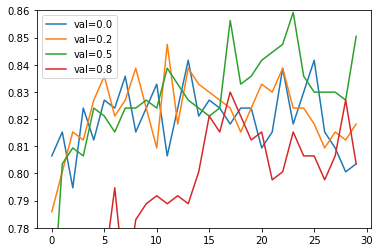

In [122]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

Looks pretty similar at the end except for 0.5
- 0.8 dropout rate sems unnecessary complexity.
    - Interestingly meets with 0.0 at the end

Let's look at just 0.5

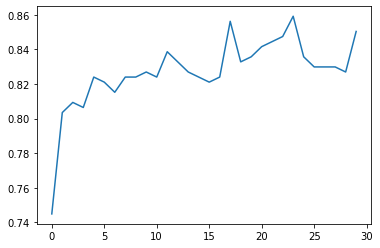

In [123]:
hist = scores[0.5]
plt.plot(hist['val_accuracy'], label=0.5)

0.5 potentially just got lucky as it dropped right after 86% accuracy.
- Gut feeling is just pure luck.

Let's look at the training accuracy too:

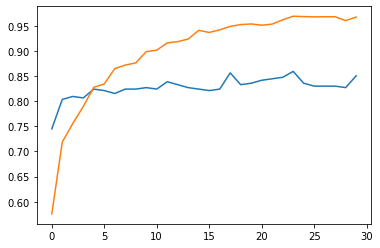

In [125]:
hist = scores[0.5]
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

May be overfitting. The intersection around epoch 5 is more interesting

Let's take a look at the rest, more important 0.2 though:

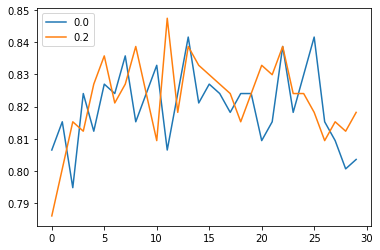

In [120]:
hist = scores[0.2]
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

Looks about as well as 0.5. Might go with this as it less complex
- Would use an *early* epoch as it is less likely to have overfit there

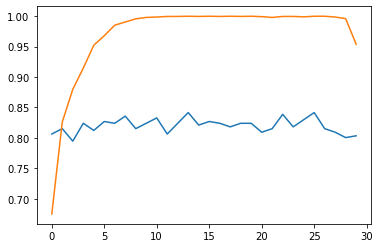

In [130]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

Notably goes right to 100% train accuracy and dips
- Kind of suspicious
- Would still go with 0.2

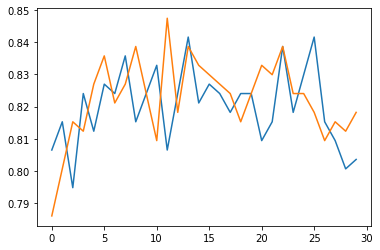

In [133]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

Very close. Top values are slightly better for 0.2.
- Would still rather go with 0.2 as some regularization is better than none

## 8.10 Data augmentation

* Different data augmentations
* Training a model with augmentations
* How to select data augmentations?

Data augmentation is a way to create more data from data
- NNs normally see the same image over and over and may learn too much about the biases of the image
    - E.g learning position or direction
- Augmentation changes an image so NNs develop classification invariance for a class

These keep the image resolution the same

We will use ImageDataGenerator. Also see [Augmentations](augmentations.ipynb). 
- This notebook uses code from the internals of ImageDataGenerator

Examples:
- Flipping (horizontally, vertically)
- Rotation (degrees +ve or -ve)
- Shear (Pull the corner down; +ve for right side -ve for left) 
- Zooming (in, out)
- Brightness/contrast
- Black patch (usually just called patching.

We can combine all of these at once

How to choose augmentations?
* Use your own judgements
    - Vertical flip because clothes tend to be symmetrical
    - Horizontal flip doesn't make sense because we don't expect images upside down
* Look at the dataset, what kind of variations are there?
    - Are the objects always centered?
        - E.g. rotated, shift
* Tune it as a hyperparameter
    - Train it for 10-20 epochs, and see if it is better with/without augmentation
        - Better? Use
        - Worse? Don't use
        - Same? Train for 20 more epochs.
            - If still the same, don't use

In [138]:
# These are the only ones that seemed to help
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     rotation_range=30, # would be a random number from range [-30, 30]
#     width_shift_range=10.0, # would be random number from [-10%, 10%]
#     height_shift_range=10.0,
#     brightness_range=None,
#     shear_range=1.0, # shear intensity in degrees
#     zoom_range=0.1, # would be random number in range [0.9, 1.1]
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


Don't use augmentations on validation dataset. Want this to be consistent
- Can think of this as unseen images in production. Only apply what would be possible

In [140]:
# Need a lot more iterations because we are augmenting
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

# Reduced to 10 from 50 after removing augmentation
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 15s 124ms/step - loss: 1.0821 - accuracy: 0.6431 - val_loss: 0.7032 - val_accuracy: 0.7683
Epoch 2/10
96/96 [==============================] - 10s 109ms/step - loss: 0.6280 - accuracy: 0.7751 - val_loss: 0.5898 - val_accuracy: 0.7977
Epoch 3/10
96/96 [==============================] - 10s 108ms/step - loss: 0.4972 - accuracy: 0.8246 - val_loss: 0.5443 - val_accuracy: 0.8035
Epoch 4/10
96/96 [==============================] - 10s 101ms/step - loss: 0.3905 - accuracy: 0.8693 - val_loss: 0.5383 - val_accuracy: 0.8328
Epoch 5/10
96/96 [==============================] - 11s 117ms/step - loss: 0.3104 - accuracy: 0.9006 - val_loss: 0.5586 - val_accuracy: 0.8123
Epoch 6/10
96/96 [==============================] - 11s 107ms/step - loss: 0.2354 - accuracy: 0.9260 - val_loss: 0.5345 - val_accuracy: 0.8328
Epoch 7/10
96/96 [==============================] - 10s 104ms/step - loss: 0.1858 - accuracy: 0.9456 - val_loss: 0.5984 - val_accuracy: 0.8152

After using `nvidia-smi`, GPU not used as much as with augmentation
- Because generating more data is being done by CPU and needs to be passed to GPU

Generating the augmentation takes around 200 ms/step, and fitting the model takes 200 ms/step

Way to combat this is with pipelining:
- While working on the first batch, we must wait for the CPU to generate augmentations
- Then we fit on the GPU. But while we are fitting, we can let the CPU generate augmentations.

Keras does not provide this directly. Can improve performance with [TF Data API](https://www.tensorflow.org/guide/data_performance)

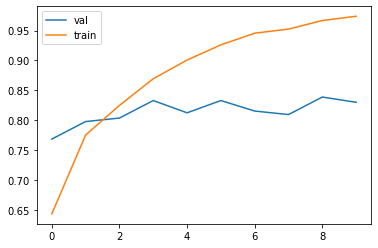

In [141]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

Can see the train accuracy is still improving but the validation accuracy is stagnant.

Let's try with less aggressive shearing. - Wasn't effective
- Alexey removed all augmentations and retried
- Note that for NNs there are so many moving parts with randomness that reproducibility is hard.

Tuning NNs is more of an art than a science.
- 84% val accuracy is usually enough for most use cases
- Our dataset is not very large so this is probably fine.
    - Additionally, we are only working on small (150 x 150) images

## 8.11 Training a larger model

* Train a 299x299 model

So far, we were only using small models as they train 4 x 4 faster to focus on experimenting quicker.
- We will take the same `make_model()` function and add `input_size` parameter

In [143]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [144]:
input_size = 299

Still want to play with augmentation for larger models.
- This is something that can change with model size

In [145]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


Adding checkpointing back in for big models

In [146]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

Abbreviated for time, but first Alexey experimented with no augmentation and lr=0.001
- Immediately noticed ~85% val acc.
- Each step was around 630 ms for 299 x 299 images
    - Before was around 160 for 150 x 150 images
    - ~4x slower
- Best accuracy was ~89% but training acc kept growing
- Then he wanted to add augmentation and a lower lr

Second attempt: added shear, zoom and flip back. lr=0.0005. Trained for 50 epochs
- Some good results like ~90% val acc and ~93% train acc
    - Happy with this because there is not a huge discrepancy between the two
- Started out around ~86%. Val acc was a little better in the start
- This is about the best acc he has seen 

In [147]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50
96/96 [==============================] - 73s 720ms/step - loss: 0.9748 - accuracy: 0.6874 - val_loss: 0.6016 - val_accuracy: 0.8123
Epoch 2/50
96/96 [==============================] - 51s 535ms/step - loss: 0.5143 - accuracy: 0.8178 - val_loss: 0.4879 - val_accuracy: 0.8240
Epoch 3/50
96/96 [==============================] - 58s 600ms/step - loss: 0.4262 - accuracy: 0.8621 - val_loss: 0.4421 - val_accuracy: 0.8387
Epoch 4/50
96/96 [==============================] - 48s 503ms/step - loss: 0.3841 - accuracy: 0.8651 - val_loss: 0.4049 - val_accuracy: 0.8680
Epoch 5/50
96/96 [==============================] - 46s 477ms/step - loss: 0.3427 - accuracy: 0.8836 - val_loss: 0.3725 - val_accuracy: 0.8798
Epoch 6/50
96/96 [==============================] - 59s 620ms/step - loss: 0.3108 - accuracy: 0.8934 - val_loss: 0.3934 - val_accuracy: 0.8592
Epoch 7/50
96/96 [==============================] - 58s 601ms/step - loss: 0.2951 - accuracy: 0.8963 - val_loss: 0.3737 - val_accuracy: 0.8651

KeyboardInterrupt: 

## 8.12 Using the model

* Loading the model
* Evaluating the model
* Getting predictions

In the previous lesson we trained our final model
- Images size 299 x 299, with shear, zoom and vertical flip
- LR was 0.0005, inner layer size was 100, drop rate was 0.2

Now we will take the saved h5 file and use it for making predictions.
- Can reload notebook from scratch and act as though we are loading this for the first time

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

Need to create ImageDataGenerator for testing data.
- Recall we need to preprocess input.

In [4]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


Now we can just load the model and run it:

In [5]:
# model = keras.models.load_model('xception_v4_1_13_0.903.h5')
model = keras.models.load_model('xception_v4_1_09_0.891.h5')

In [6]:
model.evaluate(test_ds)

12/12 [==============================] - 6s 142ms/step - loss: 0.2827 - accuracy: 0.9005


[0.28270775079727173, 0.9005376100540161]

Unsure of what the first number is, would have to check documentation
- Second number is the test accuracy. Almost the same as validation (did not overfit).

Here Alexey loads an early model he did not trust to do well
- It did not overfit, got around the same acc

Now want to apply model to single image.

In [7]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

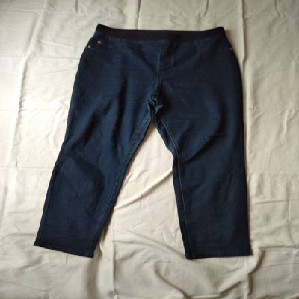

In [8]:
img = load_img(path, target_size=(299, 299))
img

Need to convert to NumPy array now:

In [9]:
import numpy as np

In [10]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

One image in list is just a batch of 1.

Now we need to preprocess X:

In [11]:
X = preprocess_input(X)

In [12]:
pred = model.predict(X)

1/1 [==============================] - 1s 837ms/step


In [13]:
pred[0]

array([-2.3772297 , -5.1541376 , -0.49725887, -0.43487078,  8.692295  ,
       -0.33770606, -3.4376168 ,  3.926463  , -2.8511064 , -3.8255959 ],
      dtype=float32)

Need the classes to interpret this

In [14]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [15]:
dict(zip(classes, pred[0]))

{'dress': -2.3772297,
 'hat': -5.1541376,
 'longsleeve': -0.49725887,
 'outwear': -0.43487078,
 'pants': 8.692295,
 'shirt': -0.33770606,
 'shoes': -3.4376168,
 'shorts': 3.926463,
 'skirt': -2.8511064,
 't-shirt': -3.8255959}

Pants had the best score. Second biggest is shorts. Makes sense
- Notice these are **logits**. Not probability, just a score for the class 

## 8.13 Summary

Use case: fashion classification for clothing marketplace website
- Used NN, CNN specifically, as convolution is a good image-specific inductive bias
- Used Tensorflow, ML framework. Mostly used Keras, a high level abstraction on top of TF

* We can use pre-trained models for general image classification
    - People train much larger models we could not.
    - We can build on top of these to utilize the learning
* Convolutional layers let us turn an image into a vector
    - Built our first NN by take Xception and removing the top, leaving just the convolutions
* Dense layers use the vector to make the predictions
    - Used dense layer on top of Xception to predict for our task
* Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
    - Someone already did this very well on a more general case. Can utilize this trained network
* First, train a small model (150x150) before training a big one (299x299)
    - Around 4x faster - good for experimentation
* Learning rate - how fast the model trains. Fast learners aren't always best ones
    - Trade-off between speed and accuracy. Want good accuracy but cannot wait forever
* We can save the best model using callbacks and checkpointing
    - Every iteration model may be better or worse, and prior model is overwritten
    - May want to use or reload better, earlier state
* To avoid overfitting, use dropout and augmentation
    - Dropout is freezing of network to avoid overfitting
        - Given drop rate, freezes certain % of layer 
        - Forces network to not over rely on neuron and adjacent neurons to be more robust
    - Can make infinitely more images from existing ones by augmenting
        - Can flip, zoom, etc to make network more general
* Made final model by training on full image size (299 x 299) and best hyperparameters
    - Applied model to test datast and saw it did not overfit

## 8.14 Explore more

* Add more data, e.g. Zalando, etc (ADD LINKS)
* Albumentations - another way of generating augmentations
    - Can make patches of or over images
* Use PyTorch or MXNet instead of TensorFlow/Keras
* In addition to Xception, there are others architectures - try them
    - Can take many CNN models or try image transformers

Other projects:

* cats vs dogs
* Hotdog vs not hotdog
* Category of images